# 1)Create an exploratory data analysis for the given dataset(EDA)

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv('../../Assignments/Linear_regression/dataset_1/train.csv')
df1 = pd.read_csv('../../Assignments/Linear_regression/dataset_1/test.csv')


In [96]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 5) Understanding which variables drive the price of homes in Boston

In [98]:
cor = df.corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [99]:
df_feat=df[['OverallQual','YearBuilt','1stFlrSF','GrLivArea','GarageArea']]

In [100]:
df_feat.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,GarageArea
0,7,2003,856,1710,548
1,6,1976,1262,1262,460
2,7,2001,920,1786,608
3,7,1915,961,1717,642
4,8,2000,1145,2198,836


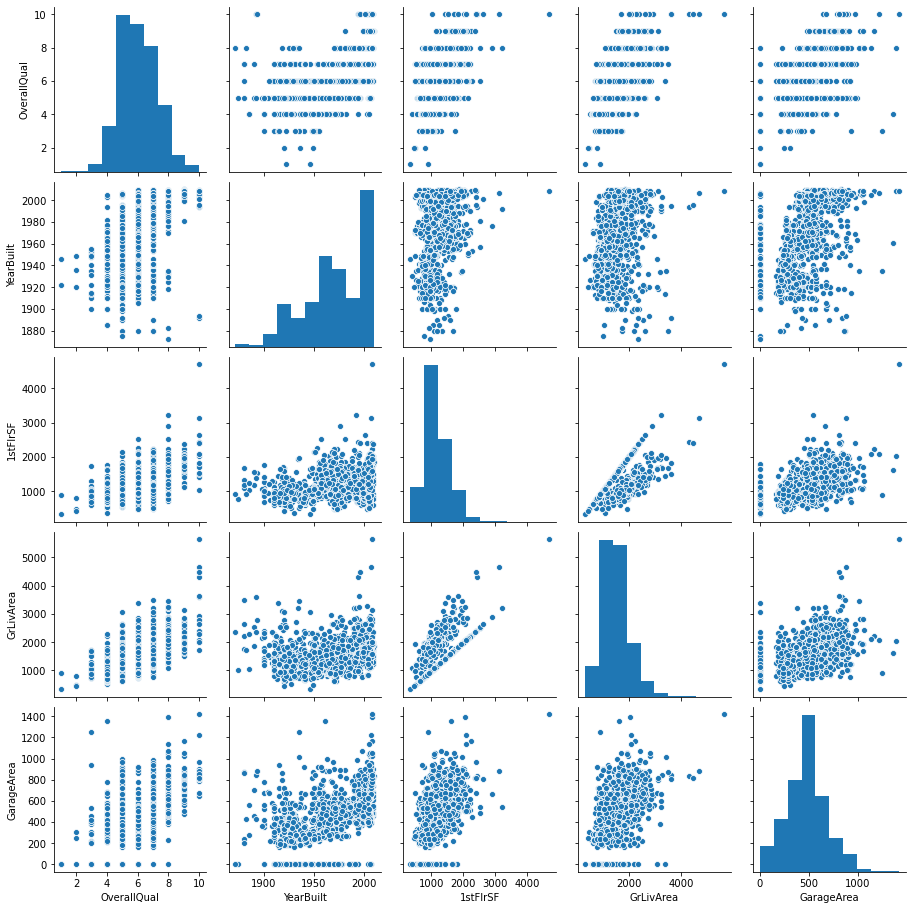

In [101]:
sns.pairplot((df_feat))

# 2)Plot co-relation heatmaps

<AxesSubplot:>

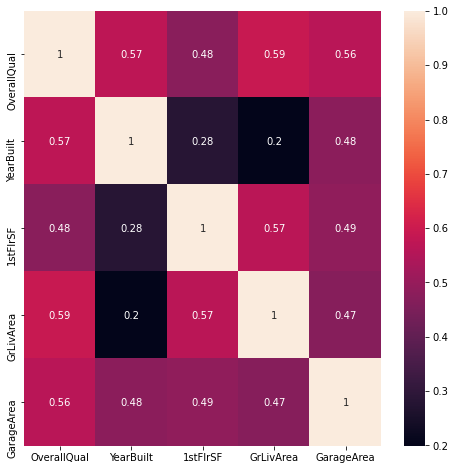

In [105]:
plt.figure(figsize=(8,8))
sns.heatmap(df_feat.corr(), annot=True)

# 3) Missing value treatment

In [106]:
df_feat.isnull()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,GarageArea
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1455,False,False,False,False,False
1456,False,False,False,False,False
1457,False,False,False,False,False
1458,False,False,False,False,False


In [107]:
df_feat.isnull().sum()

OverallQual    0
YearBuilt      0
1stFlrSF       0
GrLivArea      0
GarageArea     0
dtype: int64

<AxesSubplot:>

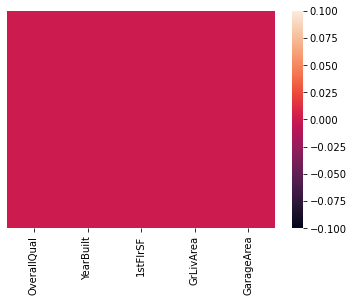

In [108]:
sns.heatmap(df_feat.isnull(),yticklabels=False)

# 4) Outlier treatment

In [112]:
df_feat.head()

,OverallQual,YearBuilt,FirstArea,GroundArea,GarageArea
0,7,2003,856,1710,548
1,6,1976,1262,1262,460
2,7,2001,920,1786,608
3,7,1915,961,1717,642
4,8,2000,1145,2198,836


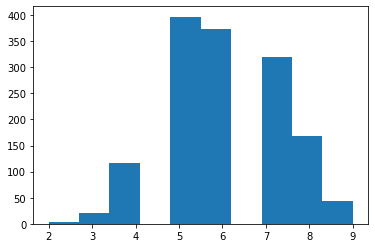

In [113]:
min_thresold, max_thresold = df_feat.OverallQual.quantile([0.001, 0.999])
min_thresold, max_thresold
df2 = df[(df_feat.OverallQual<max_thresold) & (df_feat.OverallQual>min_thresold)]
plt.hist(df2['OverallQual'])
plt.show()

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

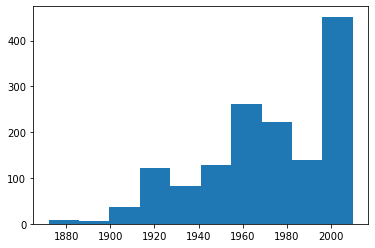

In [114]:
plt.hist(df_feat['YearBuilt'])

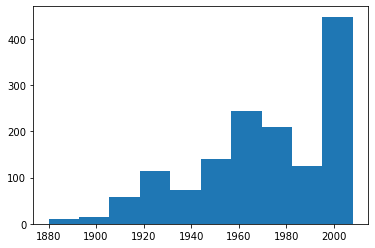

In [115]:
min_thresold, max_thresold = df_feat.YearBuilt.quantile([0.001, 0.999])
min_thresold, max_thresold
df_feat = df[(df_feat.YearBuilt<max_thresold) & (df_feat.YearBuilt>min_thresold)]
plt.hist(df_feat['YearBuilt'])
plt.show()

In [118]:
min_thresold, max_thresold = df_feat.FirstArea.quantile([0.001, 0.999])
min_thresold, max_thresold
df_feat = df[(df_feat.FirstArea<max_thresold) & (df_feat.FirstArea>min_thresold)]
plt.hist(df_feat['FirstArea'])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'FirstArea'

In [120]:
min_thresold, max_thresold = df_feat.GrLivArea.quantile([0.001, 0.999])
min_thresold, max_thresold
df_feat = df[(df_feat.GrLivArea<max_thresold) & (df_feat.GrLivArea>min_thresold)]
plt.hist(df_feat['GrLivArea'])
plt.show()

/home/shikha/anaconda3/envs/ore/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

# 6) split data into train and test

In [124]:
X_train =df[['OverallQual','YearBuilt','1stFlrSF','GrLivArea','GarageArea']]
X_test = df1[['OverallQual','YearBuilt','1stFlrSF','GrLivArea','GarageArea']]
y_train = df['SalePrice']

# 7) fit on train data

In [126]:
X_train

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,GarageArea
0,7,2003,856,1710,548
1,6,1976,1262,1262,460
2,7,2001,920,1786,608
3,7,1915,961,1717,642
4,8,2000,1145,2198,836
...,...,...,...,...,...
1455,6,1999,953,1647,460
1456,6,1978,2073,2073,500
1457,7,1941,1188,2340,252
1458,5,1950,1078,1078,240


In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# 8) predict on test data

In [129]:
predictions= lm.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [130]:
plt.scatter(predictions,y_test)

NameError: name 'predictions' is not defined

In [131]:
print(lm.coef_) 

[22404.20936124   365.52908031    30.04727042    46.92892704
    44.761513  ]


In [132]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

NameError: name 'y_test' is not defined

<AxesSubplot:xlabel='MEDV'>

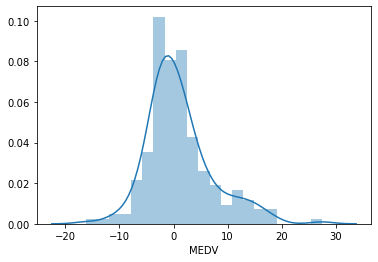

In [59]:
sns.distplot((y_test-predictions))

In [60]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Printing the coefficients of the Feature varibales
cdf

,Coeff
RM,4.528345
LSTAT,-0.650371


In [ ]:
rooms=float(input("How many rooms you require?"))
roo= rooms*lm.coef_[0]